In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16,ResNet50


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [2]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [3]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [4]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [5]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [6]:
array_filename= df['filename'].unique()

In [7]:
array_filename.shape

(61,)

In [8]:
df.shape

(182, 12)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [9]:
file_path2 = 'C:/Users/andre/Downloads/csv_final_video2.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [10]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [11]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [12]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(135,)

In [13]:
df2.shape

(405, 12)

In [14]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [15]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
582,frame_24361.jpg,106592,{},3,1,"{""name"":""rect"",""x"":407,""y"":404,""width"":139,""he...","{""Region"":""surco""}",surco,407,404,546,473
583,frame_24361.jpg,106592,{},3,2,"{""name"":""rect"",""x"":461,""y"":236,""width"":281,""he...","{""Region"":""segmento4""}",segmento4,461,236,742,359
584,frame_24462.jpg,121924,{},3,0,"{""name"":""rect"",""x"":119,""y"":126,""width"":346,""he...","{""Region"":""vesicula""}",vesicula,119,126,465,388
585,frame_24462.jpg,121924,{},3,1,"{""name"":""rect"",""x"":375,""y"":402,""width"":134,""he...","{""Region"":""surco""}",surco,375,402,509,463
586,frame_24462.jpg,121924,{},3,2,"{""name"":""rect"",""x"":471,""y"":228,""width"":251,""he...","{""Region"":""segmento4""}",segmento4,471,228,722,356


In [16]:
merged_df.shape

(587, 12)

**Cargar Imágenes**

In [17]:
class_folders = [
        'antes-cirugia',
        'durante-cirugia-cordinates',
        'despues-cirugia'
]

In [18]:
def ensure_directory_exists(directory):
    """
    Crea el directorio si no existe.
    
    Parámetros:
    -----------
    directory : str
        La ruta del directorio.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)

In [19]:
def get_image_filenames(image_dirs):
    """
    Obtiene los nombres de los archivos de imagen .jpg de múltiples directorios.
    
    Parámetros:
    -----------
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
        
    Retorno:
    --------
    list : Lista de nombres de archivos .jpg.
    """
    image_filenames = []
    for image_dir in image_dirs:
        image_filenames += [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    return image_filenames

**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [20]:
def read_imageResize_with_labels(df, image_dirs, target_size=(224, 224)):
    """
    Lee imágenes de múltiples directorios, las redimensiona a 224x224 píxeles y las etiqueta según 
    los valores en el DataFrame. Las imágenes son procesadas en RGB.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene la información de las imágenes y coordenadas.
    image_dirs : list
        Lista de rutas de los directorios que contienen las imágenes.
    target_size : tuple, opcional
        Tamaño al que se redimensionarán las imágenes. Por defecto es (224, 224).

    Retorno:
    --------
    tuple: 
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - dict: Un diccionario con los bounding boxes y las etiquetas correspondientes a las imágenes.
    """
    images_now = []
    bbox_targets = []
    class_targets = []

    # Obtener todos los nombres de archivo de las imágenes de los directorios especificados
    image_filenames = get_image_filenames(image_dirs)

    # Procesar cada imagen en la lista de archivos
    for name_image in image_filenames:
        # Obtener la ruta completa de la imagen
        image_path = None
        for image_dir in image_dirs:
            possible_path = os.path.join(image_dir, name_image)
            if os.path.exists(possible_path):
                image_path = possible_path
                break

        if image_path is None:
            print(f"Error: No se pudo encontrar la imagen {name_image}")
            continue

        # Leer y procesar la imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Advertencia: No se pudo leer la imagen {image_path}")
            continue

        height, width = image.shape[:2]
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
        image = image / 255.0

        # Buscar en el DataFrame las etiquetas correspondientes a esta imagen
        df_image = df[df['filename'] == name_image]

        # Verificar si hay regiones en la imagen
        if df_image.empty:
            # Imagen sin regiones: asignar etiquetas de una nueva clase "sin regiones" (ejemplo: clase 3)
            bboxes = [[0, 0, 0, 0] for _ in range(3)]
            labels = [3 for _ in range(3)]  
        else:
            # Imagen con regiones: procesar normalmente
            bboxes = []
            labels = []
            for _, row in df_image.iterrows():
                label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
                label = label_map.get(row['label'], 3)  # Clase especial "sin regiones" si no es válida
                x_scale = target_size[0] / width
                y_scale = target_size[1] / height

                x_min = row['x_min'] * x_scale
                y_min = row['y_min'] * y_scale
                x_max = row['x_max'] * x_scale
                y_max = row['y_max'] * y_scale

                bbox = [x_min, y_min, x_max, y_max]
                bboxes.append(bbox)
                labels.append(label)

            # Asegurarse de que cada imagen tenga 3 regiones, si no, rellenar con valores vacíos
            while len(bboxes) < 3:
                bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
                labels.append(3)  # Asignar clase especial "sin regiones"

        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=4))  # 4 clases ahora (0, 1, 2, 3)

    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)

    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}


In [21]:

images, targets = read_imageResize_with_labels(merged_df,image_dirs=class_folders)



In [22]:

print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
primera_llave = next(iter(targets))
primer_valor = targets[primera_llave]


Número de imágenes: 608
Tamaño de cada imagen: (224, 224, 3)


In [23]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [24]:
def inspect_random_targets(targets, num_items=5):
    """
    Inspecciona 'num_items' elementos aleatorios de targets para visualizar 
    los bounding boxes y las etiquetas de clase.
    
    Parámetros:
    ----------
    targets : dict
        Diccionario que contiene 'bounding_box' y 'class_label'.
    num_items : int, opcional
        Número de elementos a visualizar.
    """
    bounding_boxes = targets['bounding_box']
    class_labels = targets['class_label']
    

    random_indices = np.random.choice(len(bounding_boxes), num_items, replace=False)
    
    for i in random_indices:
        print(f"--- Imagen {i+1} ---")
        
        print(f"Bounding Boxes (imagen {i+1}):")
        for bbox in bounding_boxes[i]:
            print(f"x_min: {bbox[0]}, y_min: {bbox[1]}, x_max: {bbox[2]}, y_max: {bbox[3]}")
        
        print(f"Class Labels (imagen {i+1}):")
        for label in class_labels[i]:
            label_index = np.argmax(label)
            # Ajusta el nombre para la clase especial 3
            if label_index == 3:
                label_name = 'sin regiones'
            else:
                label_name = 'vesicula' if label_index == 0 else ('surco' if label_index == 1 else 'segmento4')
                
            print(f"Label: {label_index} ({label_name})")
        
        print("\n")


In [25]:

inspect_random_targets(targets, num_items=3)

--- Imagen 299 ---
Bounding Boxes (imagen 299):
x_min: 65.31147540983606, y_min: 44.8, x_max: 163.14754098360658, y_max: 109.66666666666667
x_min: 113.8360655737705, y_min: 107.33333333333333, x_max: 139.27868852459017, y_max: 151.66666666666666
x_min: 116.98360655737706, y_min: 25.2, x_max: 165.5081967213115, y_max: 61.6
Class Labels (imagen 299):
Label: 0 (vesicula)
Label: 1 (surco)
Label: 2 (segmento4)


--- Imagen 239 ---
Bounding Boxes (imagen 239):
x_min: 83.40983606557377, y_min: 11.2, x_max: 156.06557377049182, y_max: 160.06666666666666
x_min: 106.22950819672131, y_min: 168.0, x_max: 149.24590163934428, y_max: 218.4
x_min: 172.85245901639345, y_min: 97.06666666666666, x_max: 197.24590163934428, y_max: 171.26666666666668
Class Labels (imagen 239):
Label: 0 (vesicula)
Label: 1 (surco)
Label: 2 (segmento4)


--- Imagen 472 ---
Bounding Boxes (imagen 472):
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.0, y_max: 0.0
x_min: 0.0, y_min: 0.0, x_max: 0.

In [26]:
import os
destination_directory = './durante-cirugia/' 
# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")


print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")



Imágenes en el directorio pero no en el DataFrame: 784
Imágenes en el DataFrame pero no en el directorio: 0


In [27]:
print(images.shape)

(608, 224, 224, 3)


In [28]:
def visualize_bounding_boxes(images, targets, num_images=5, columns=2):
    """
    Visualiza un número determinado de imágenes con sus correspondientes cuadros delimitadores
    y etiquetas de clase. No dibuja cuadros ni etiquetas si la clase es inválida (-1 o 3).

    Parámetros:
    -----------
    images : numpy.ndarray
        Array de imágenes.
    targets : dict
        Diccionario que contiene los cuadros delimitadores ('bounding_box') y etiquetas ('class_label').
    num_images : int, opcional
        Número de imágenes a visualizar.
    columns : int, opcional
        Número de columnas en la visualización de subplots.
    """

    
    random_indices = np.random.choice(len(images), num_images, replace=False)

    # Definir el número de filas en función del número de imágenes y columnas
    rows = (num_images + columns - 1) // columns

    # Crear subplots
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  

    for idx, i in enumerate(random_indices):
        ax = axes[idx]
        ax.imshow(images[i])
        bbox_list = targets['bounding_box'][i]
        class_list = targets['class_label'][i]

        for bbox, class_label in zip(bbox_list, class_list):
            label = np.argmax(class_label)

            # Si la etiqueta es -1 o 3 (sin regiones), no dibujar cuadros
            if label == -1 or label == 3:
                continue  


            color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
            label_name = 'vesicula' if label == 0 else ('surco' if label == 1 else 'segmento4')


            ax.add_patch(plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
                edgecolor=color, facecolor='none', linewidth=2))

            # Añadir el texto de la etiqueta
            ax.text(bbox[0], bbox[1] - 10, f"{label_name}", color=color, fontsize=12,
                    bbox=dict(facecolor='yellow', alpha=0.5))
        
        ax.axis('off')  

    # Eliminar los subplots vacíos si el número de imágenes es menor que los subplots creados
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()



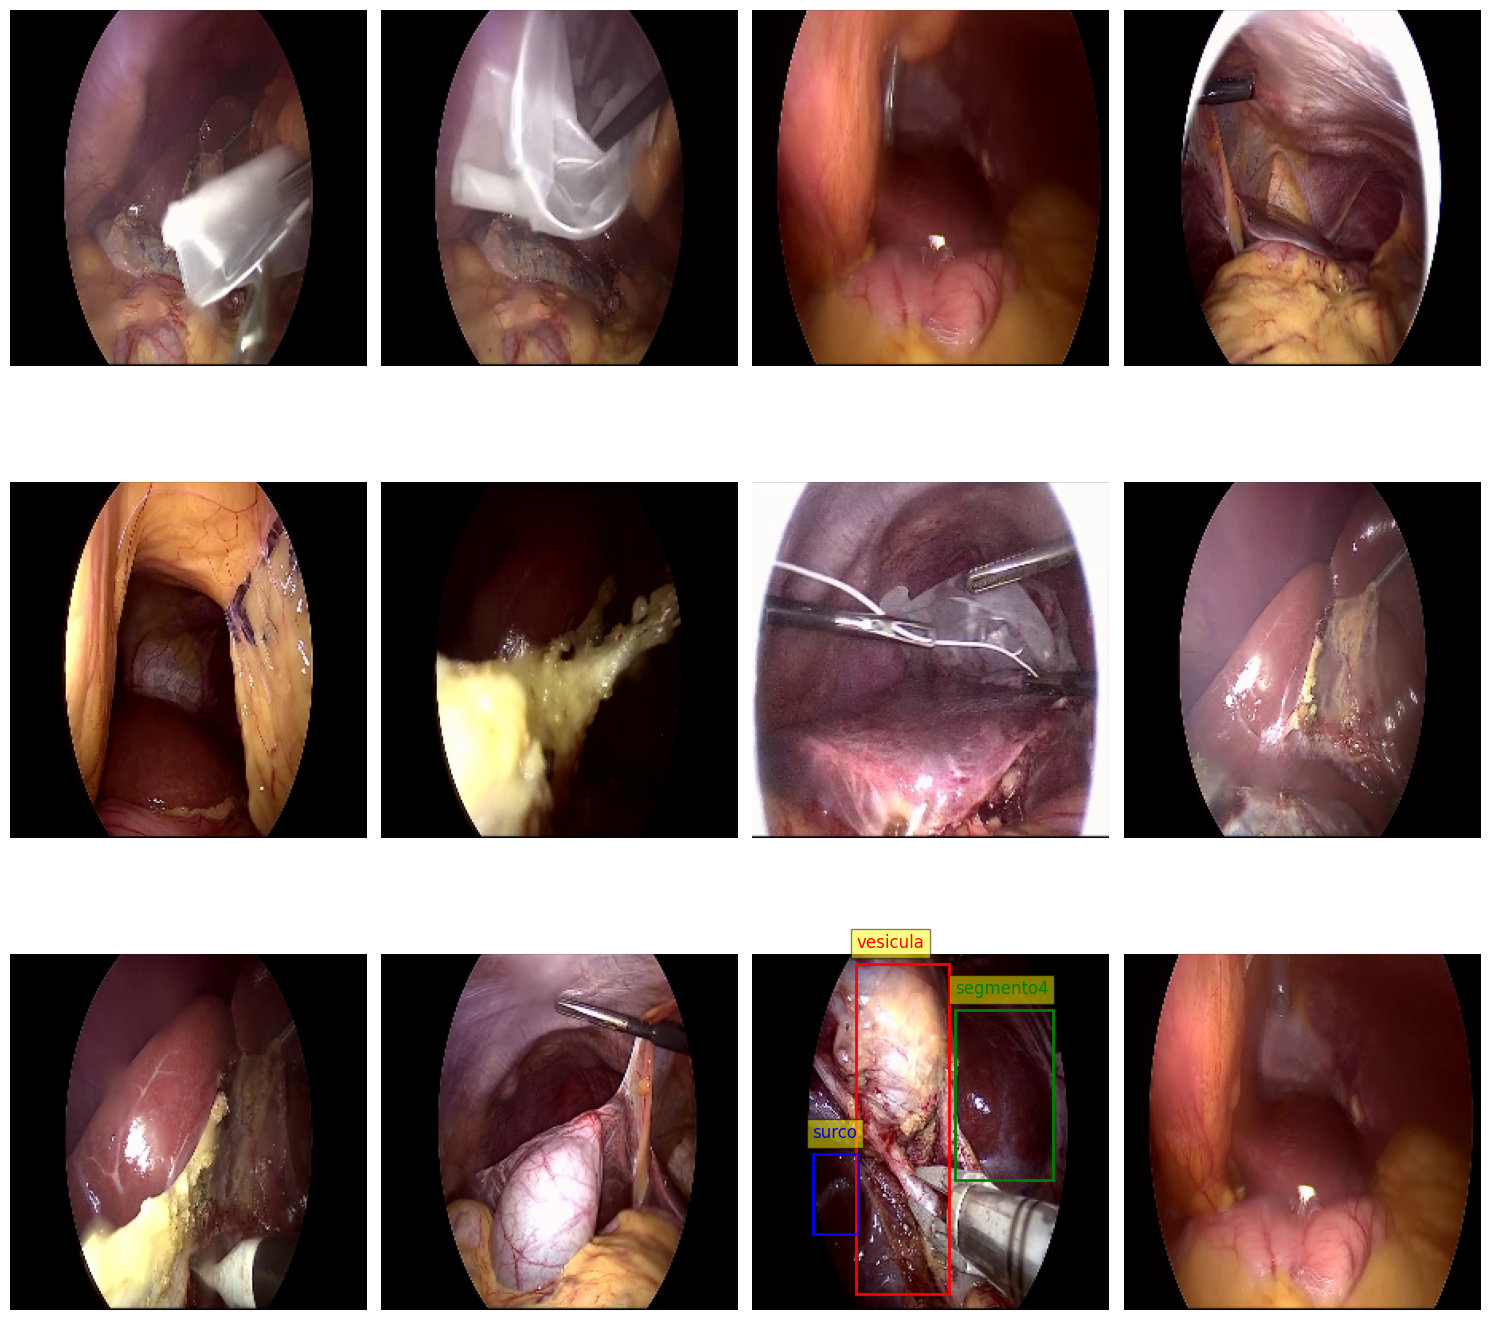

In [29]:
visualize_bounding_boxes(images, targets, num_images=12, columns=4)

**División train-test**

In [31]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'images' es el array de imágenes y 'targets' es un diccionario con bounding boxes y class labels
bounding_boxes = targets['bounding_box']
class_labels = targets['class_label']


# División en 80% para entrenamiento y 20% para validación
X_train, X_val, bbox_train, bbox_val, class_train, class_val = train_test_split(
    images, bounding_boxes, class_labels, test_size=0.2, random_state=42
)

# Creamos diccionarios para los targets de entrenamiento y validación
train_targets = {
    'bounding_box': bbox_train,
    'class_label': class_train
}

val_targets = {
    'bounding_box': bbox_val,
    'class_label': class_val
}


print(f'Conjunto de entrenamiento: {len(X_train)} imágenes, {len(train_targets["bounding_box"])} bounding boxes, {len(train_targets["class_label"])} class labels')
print(f'Conjunto de validación: {len(X_val)} imágenes, {len(val_targets["bounding_box"])} bounding boxes, {len(val_targets["class_label"])} class labels')
print(f"Shape train {class_labels.shape}")

Conjunto de entrenamiento: 486 imágenes, 486 bounding boxes, 486 class labels
Conjunto de validación: 122 imágenes, 122 bounding boxes, 122 class labels
Shape train (608, 3, 4)


In [32]:
np.array(train_targets['bounding_box']).shape


(486, 3, 4)

In [33]:
np.array(train_targets['class_label']).shape


(486, 3, 4)

In [34]:
np.array(val_targets['bounding_box']).shape

(122, 3, 4)

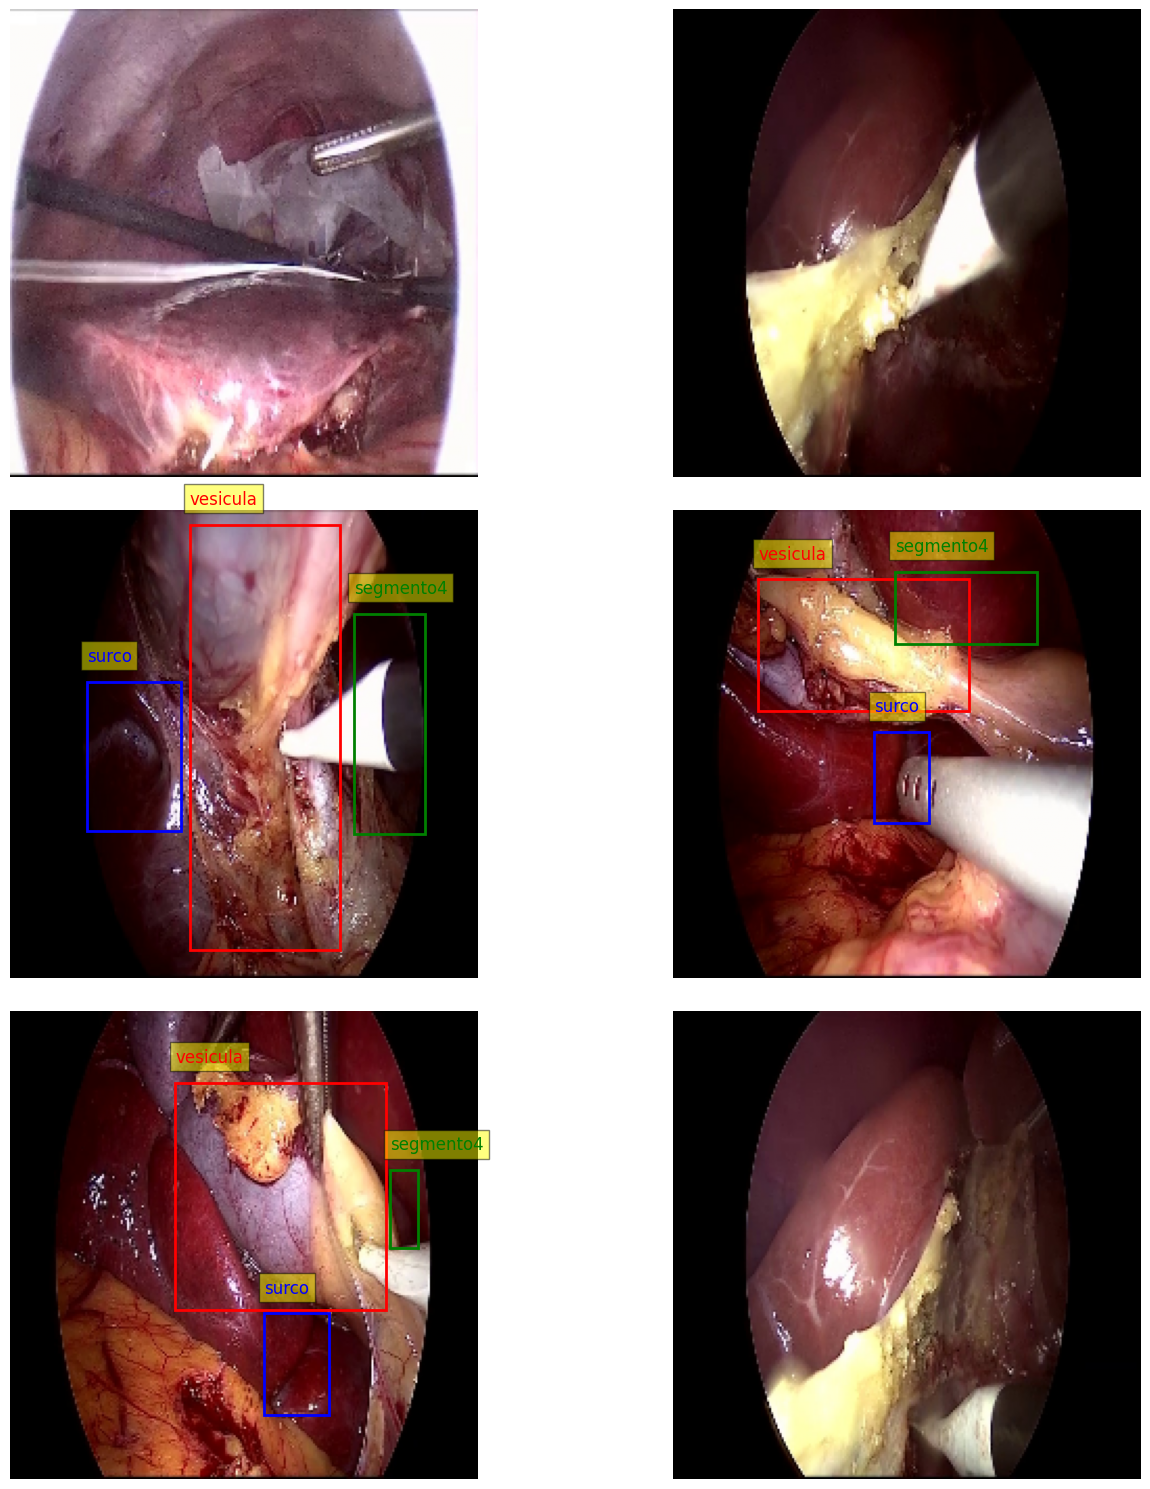

In [35]:
visualize_bounding_boxes(X_train,train_targets,6,2)

In [36]:
def normalize_bounding_boxes(bboxes, image_width, image_height):
    """
    Normaliza los bounding boxes para que estén en el rango [0, 1].
    
    Parámetros:
    -----------
    bboxes : np.array
        Array con los bounding boxes (x_min, y_min, x_max, y_max).
    image_width : int
        Ancho de la imagen.
    image_height : int
        Alto de la imagen.
        
    Retorno:
    --------
    np.array : Bounding boxes normalizados.
    """
    bboxes[:, :, [0, 2]] /= image_width  
    bboxes[:, :, [1, 3]] /= image_height  
    return bboxes


In [37]:

image_width = 224
image_height = 224

train_targets['bounding_box'] = normalize_bounding_boxes(train_targets['bounding_box'], image_width, image_height)


val_targets['bounding_box'] = normalize_bounding_boxes(val_targets['bounding_box'], image_width, image_height)


In [38]:
print(np.min(train_targets['bounding_box']), np.max(train_targets['bounding_box']))
print(np.min(val_targets['bounding_box']), np.max(val_targets['bounding_box']))


0.0 1.0
0.0 0.9895833333333333


In [39]:
train_targets['bounding_box'] = np.array(train_targets['bounding_box'])
train_targets['class_label'] = np.array(train_targets['class_label'])

val_targets['bounding_box'] = np.array(val_targets['bounding_box'])
val_targets['class_label'] = np.array(val_targets['class_label'])


**Resumen del modelo entrenado**

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def create_yolov8_inspired_model(input_shape=(224, 224, 3), num_classes=4, num_bboxes=3):
    """
    Crea una arquitectura inspirada en YOLOv8 para el reconocimiento de objetos.
    
    Parámetros:
    -----------
    input_shape : tuple, opcional
        Tamaño de la entrada de las imágenes. Por defecto es (224, 224, 3).
    num_classes : int, opcional
        Número de clases a predecir (por defecto 4, incluyendo la clase de "sin regiones").
    num_bboxes : int, opcional
        Número de regiones (bounding boxes) por imagen (por defecto 3).
    
    Retorno:
    --------
    model : keras.Model
        Modelo compilado listo para ser entrenado.
    """
    # Entrada para las imágenes
    image_input = Input(shape=input_shape, name='image_input')
    
    # Backbone inspirado en YOLO: Convoluciones profundas con normalización y activaciones LeakyReLU
    x = Conv2D(32, (3, 3), padding='same')(image_input)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar para conectar con las capas totalmente conectadas
    x = Flatten()(x)

    # Capa densa final
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Salida para los bounding boxes
    bounding_box = Dense(num_bboxes * 4, activation='linear')(x)
    bounding_box = Reshape((num_bboxes, 4), name='bounding_box')(bounding_box)  # Reshape a (n, 3, 4)

    # Salida para las clases
    class_label = Dense(num_bboxes * num_classes, activation='softmax')(x)
    class_label = Reshape((num_bboxes, num_classes), name='class_label')(class_label)  # Reshape a (n, 3, num_classes)

    # Crear el modelo
    model = Model(inputs=image_input, outputs=[bounding_box, class_label])

    # Compilar el modelo usando los nombres correctos para las salidas
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss={'bounding_box': 'mean_squared_error', 'class_label': 'categorical_crossentropy'},
                  metrics={'bounding_box': 'mse', 'class_label': 'accuracy'})
    
    # Mostrar el resumen del modelo
    model.summary()

    return model

In [41]:
model = create_yolov8_inspired_model()



c:\Users\andre\anaconda3\envs\entornoPyMedia\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ leaky_re_lu[0][0] │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ leaky_re_lu_1[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ leaky_re_lu_2[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 14, 14,    │          0 │ leaky_re_lu_3[0]

 Total params: 27,288,280 (104.10 MB)

 Trainable params: 27,286,296 (104.09 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [42]:
print(model.output_names)

ListWrapper(['bounding_box', 'class_label'])


In [43]:
# Entrenar el modelo
history = model.fit(
    X_train,  
    {'bounding_box': train_targets['bounding_box'], 'class_label': train_targets['class_label']},  
    validation_data=(X_val, {'bounding_box': val_targets['bounding_box'], 'class_label': val_targets['class_label']}),  
    epochs=20,  
    batch_size=32  
)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 722ms/step - bounding_box_mse: 11.0789 - class_label_accuracy: 0.6366 - loss: 12.1603 - val_bounding_box_mse: 0.1396 - val_class_label_accuracy: 0.6230 - val_loss: 1.4311
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 681ms/step - bounding_box_mse: 0.3221 - class_label_accuracy: 0.8538 - loss: 0.8877 - val_bounding_box_mse: 0.1445 - val_class_label_accuracy: 0.6230 - val_loss: 1.3064
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 700ms/step - bounding_box_mse: 0.3112 - class_label_accuracy: 0.9780 - loss: 0.6710 - val_bounding_box_mse: 0.1518 - val_class_label_accuracy: 0.6230 - val_loss: 1.2451
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 689ms/step - bounding_box_mse: 0.3051 - class_label_accuracy: 0.9856 - loss: 0.6058 - val_bounding_box_mse: 0.1490 - val_class_label_accuracy: 0.6230 - val_loss: 1.2149
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 692ms/step - bounding_box_mse: 0.3023 - class_label_accuracy: 0.9944 - loss: 0.5650 - val_bounding_box_mse: 0.13

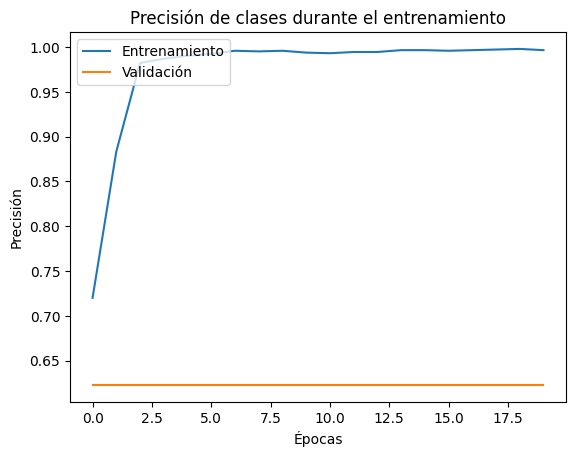

In [44]:
import matplotlib.pyplot as plt

# Graficar precisión de clases
plt.plot(history.history['class_label_accuracy'])
plt.plot(history.history['val_class_label_accuracy'])
plt.title('Precisión de clases durante el entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


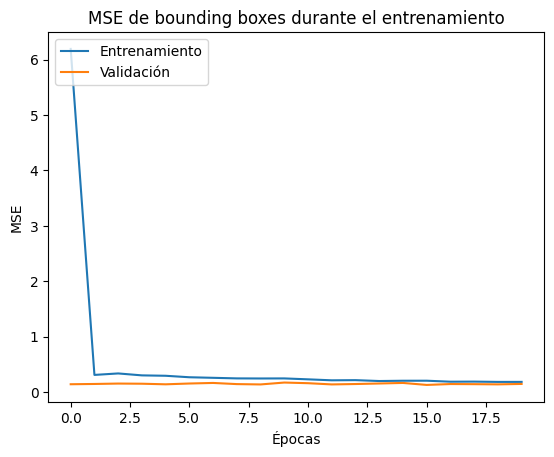

In [45]:
# Graficar MSE de los bounding boxes
plt.plot(history.history['bounding_box_mse'])
plt.plot(history.history['val_bounding_box_mse'])
plt.title('MSE de bounding boxes durante el entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


In [46]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_bbox_mse, val_class_accuracy = model.evaluate(X_val, {'bounding_box': val_targets['bounding_box'], 'class_label': val_targets['class_label']})

print(f"Pérdida en validación: {val_loss}")
print(f"MSE en bounding boxes en validación: {val_bbox_mse}")
print(f"Precisión de clases en validación: {val_class_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - bounding_box_mse: 0.1334 - class_label_accuracy: 0.6533 - loss: 1.3520
Pérdida en validación: 1.4677449464797974
MSE en bounding boxes en validación: 0.1450798362493515
Precisión de clases en validación: 0.6229507923126221
